# Bathymetry closeup

Get a closeup to a particular part of bathymetry file and compare with underlying gebco data.
See https://github.com/OceansAus/access-om2/issues/99

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import IPython.display

In [3]:
# file = '/g/data3/hh5/tmp/cosima/bathymetry/topog_latest.nc'

# see https://github.com/OceansAus/access-om2/issues/99
badbathyfile = '/g/data3/hh5/tmp/cosima/bathymetry/topog_12_10_17_yenesei.nc'
fixedbathyfile = '/g/data3/hh5/tmp/cosima/bathymetry/topog_12_06_2018.baffin.nc'

baddepth = nc.Dataset(badbathyfile).variables['depth'][:,:]
depth = nc.Dataset(fixedbathyfile).variables['depth'][:,:]

file2 = '/g/data3/hh5/tmp/cosima/bathymetry/ocean_hgrid.nc'
data2 = nc.Dataset(file2)
lons = data2.variables['x'][::2,::2]
lats = data2.variables['y'][::2,::2]

In [4]:
gebcofile = '/g/data3/hh5/tmp/cosima/bathymetry/gebco.nc'
gebcodata = nc.Dataset(gebcofile)
gebcodepth = -gebcodata.variables['height'][:,:]
gebcolat = gebcodata.variables['lat'][:]
gebcolon = gebcodata.variables['lon'][:]

In [5]:
# location of point of interest as reported by MOM (indexing from 1 presumably)

# Error: temperature out of range with value     5.579899101702E+01 at (i,j,k) = (2153,2093,  3),  (lon,lat,dpt) = (  -64.7500,   64.3310,    3.0106 m)
# This location is at the coast on the southern side of the mouth of Cumberland Sound on the east coast of Baffin Island:
# <https://www.google.com.au/maps/place/64.3310N+64.7500W/>
i = 2153
j = 2093

margin = 40

In [6]:
# adjust to suit 0-starting index (assuming MOM reports indexing from 1)
i -= 1
j -= 1
print('depth('+str(i)+','+str(j)+')='+str(depth[j,i]))

depth(2152,2092)=--


In [7]:
jgebco = (np.abs(gebcolat - lats[j,i])).argmin()
igebco = (np.abs(gebcolon - lons[j,i])).argmin()

jgebcoa = (np.abs(gebcolat - lats[j-margin,i-margin])).argmin()
igebcoa = (np.abs(gebcolon - lons[j-margin,i-margin])).argmin()

jgebcob = (np.abs(gebcolat - lats[j+margin,i+margin])).argmin()
igebcob = (np.abs(gebcolon - lons[j+margin,i+margin])).argmin()

igebcomin = min(igebcoa, igebcob)
jgebcomin = min(jgebcoa, jgebcob)
igebcomax = max(igebcoa, igebcob)
jgebcomax = max(jgebcoa, jgebcob)

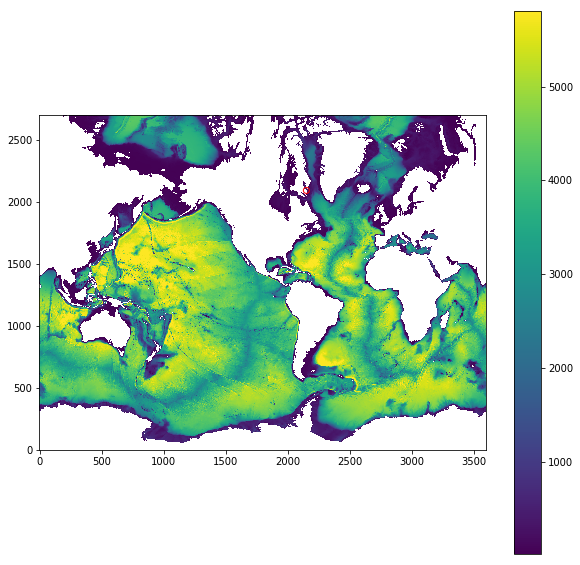

In [19]:
plt.figure(figsize=(10,10))
plt.imshow(depth, origin='lower')
plt.colorbar()
plt.scatter(i,j, facecolors='none', edgecolors='r');

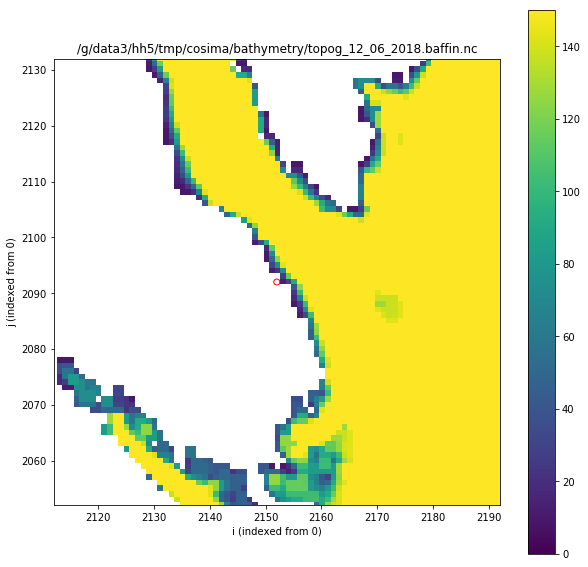

In [20]:
plt.figure(figsize=(10,10))
plt.imshow(depth, vmin=0, vmax=150, origin='lower')
plt.colorbar()
plt.scatter(i,j, facecolors='none', edgecolors='r')
plt.xlim(i-margin,i+margin)
plt.ylim(j-margin,j+margin)
plt.title(fixedbathyfile)
plt.xlabel('i (indexed from 0)')
plt.ylabel('j (indexed from 0)');

In [21]:
gebcodepthplot = gebcodepth[jgebcomin:jgebcomax,igebcomin:igebcomax]
# gebcodepthplot[gebcodepthplot<0.0] = np.float64(np.nan)

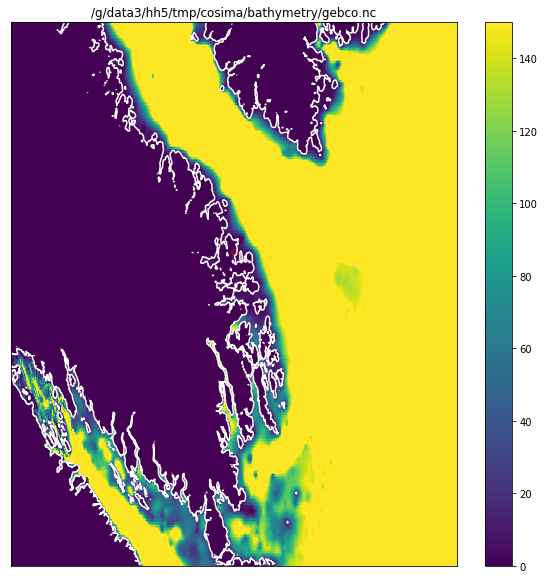

In [22]:
plt.figure(figsize=(10,10))
plt.imshow(gebcodepthplot, vmin=0, vmax=150, origin='lower',aspect='auto')
plt.colorbar()
plt.contour(gebcodepthplot,[0],colors='w')
plt.scatter(igebco-igebcomin,jgebco-jgebcomin, facecolors='none', edgecolors='r')
plt.title(gebcofile)
plt.gca().axes.get_xaxis().set_ticks([])
plt.gca().axes.get_yaxis().set_ticks([]);
# plt.xlabel('i')
# plt.ylabel('j')

## Changes in fixed bathymetry
see https://github.com/OceansAus/access-om2/issues/99

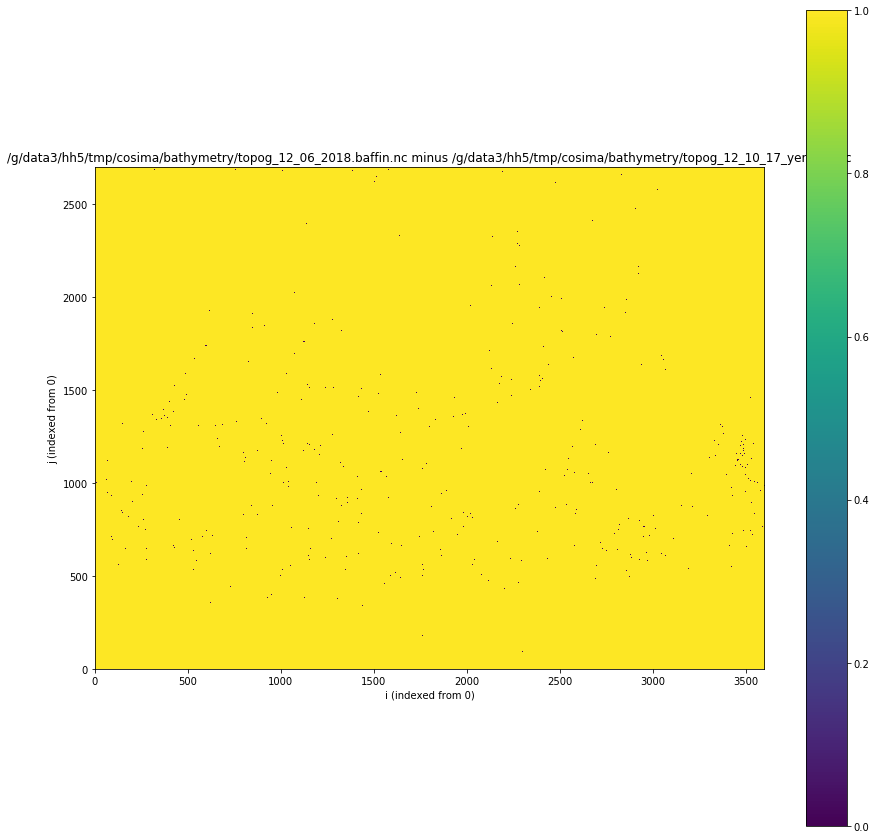

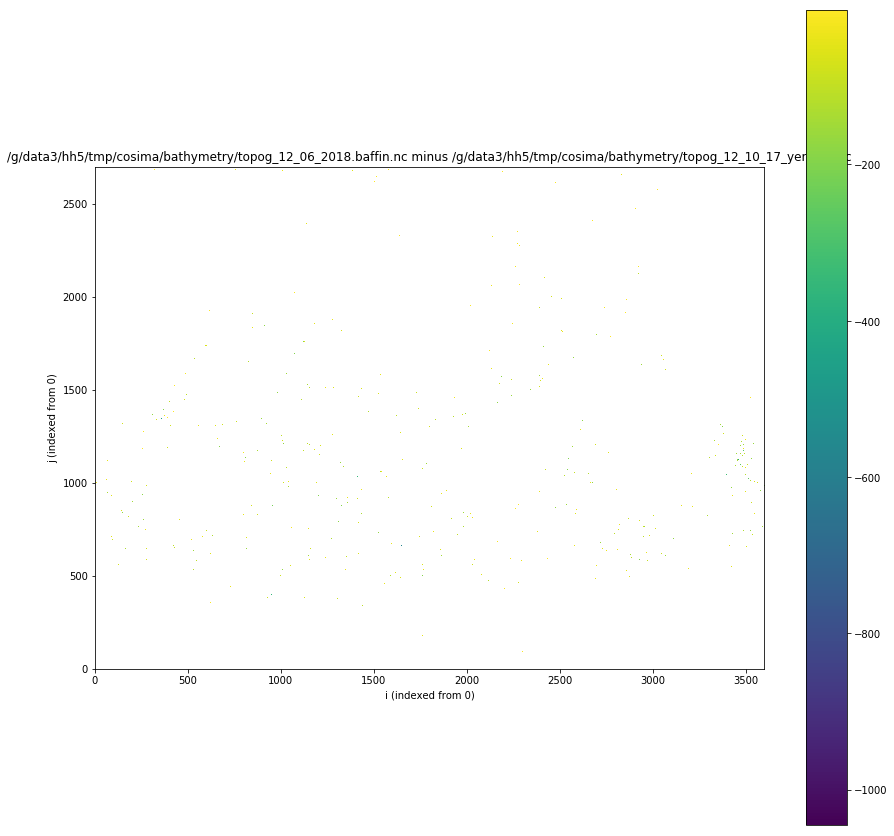

In [49]:
depthchange = depth-baddepth
# change mask so we don't plot points with zero depth change
depthchange.mask = np.ma.mask_or(np.ma.getmask(depthchange),np.ma.make_mask(depthchange==0))

plt.figure(figsize=(15,15))
plt.imshow(depthchange.mask, origin='lower')
plt.colorbar()
# plt.contour(depth,[11],colors='k')
# plt.scatter(i,j, facecolors='none', edgecolors='r')
# plt.xlim(i-margin,i+margin)
# plt.ylim(j-margin,j+margin)
plt.title(fixedbathyfile+' minus '+badbathyfile)
plt.xlabel('i (indexed from 0)')
plt.ylabel('j (indexed from 0)');

plt.figure(figsize=(15,15))
plt.imshow(depthchange, origin='lower')
plt.colorbar()
# plt.contour(depth,[11],colors='k')
# plt.scatter(i,j, facecolors='none', edgecolors='r')
# plt.xlim(i-margin,i+margin)
# plt.ylim(j-margin,j+margin)
plt.title(fixedbathyfile+' minus '+badbathyfile)
plt.xlabel('i (indexed from 0)')
plt.ylabel('j (indexed from 0)');

All depth changes are negative, i.e. ocean is filled in. Most changes are small.

In [36]:
np.ma.max(depth-baddepth)

0.0

In [37]:
np.ma.max(depthchange)

-2.1790781

In [38]:
np.ma.min(depthchange)

-1045.592

In [46]:
np.ma.mean(depthchange)

-89.757468145351581

In [47]:
np.ma.median(depthchange)

-73.055176

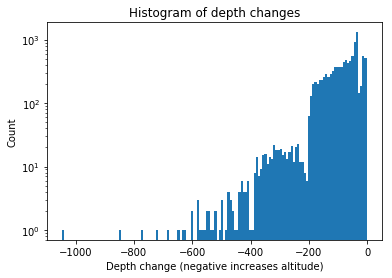

In [50]:
plt.hist(np.ma.ravel(depthchange), bins=140, log=True);
plt.xlabel('Depth change (negative increases altitude)')
plt.ylabel('Count');
plt.title('Histogram of depth changes');